In [1]:
from resnet_arch import create_resnet
import torch
import h5py
import os
import torch
import numpy as np

In [17]:
#define model architecture
model_random = create_resnet('cpu', 18, 250, 0, pretrained_weights=True)

IMAGENET1K_V1
Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
Sequential (Sequential)                       [16, 1, 820, 820]    [16, 2]              --                   True
├─ResNet (0)                                  [16, 1, 820, 820]    [16, 1000]           --                   True
│    └─Conv2d (conv1)                         [16, 1, 820, 820]    [16, 64, 410, 410]   3,136                True
│    └─BatchNorm2d (bn1)                      [16, 64, 410, 410]   [16, 64, 410, 410]   128                  True
│    └─ReLU (relu)                            [16, 64, 410, 410]   [16, 64, 410, 410]   --                   --
│    └─MaxPool2d (maxpool)                    [16, 64, 410, 410]   [16, 64, 205, 205]   --                   --
│    └─Sequential (layer1)                    [16, 64, 205, 205]   [16, 64, 205, 205]   --                   True
│    │    └─BasicBlock (0)                    [16, 64, 205, 205]   [16, 6

In [18]:
#evaluate model with randomized weights
model_random.eval()
model_random = model_random.to('cpu')
preds_random = []
imgs = []
for file in os.listdir('E5_reduced'):
    if file[:4] == 'rank':
        h = h5py.File('E5_reduced/'+file, 'r')
        N = h['images'].shape[0]
        for i_img in range(N):
            img = np.array(h['images'][i_img]).astype(np.float32)[None,None]
            imgs.append(img)
            # print(img.shape) # should be 1,1,820,820 or whatever
            img_t = torch.tensor(img)
            #make predictions
            with torch.no_grad():
                pred = (model_random(img_t))
                print(pred)
                preds_random.append(pred)

tensor([[ 0.3220, -0.0478]])
tensor([[ 0.3593, -0.0620]])
tensor([[ 0.3824, -0.0572]])
tensor([[ 0.3734, -0.0686]])
tensor([[ 0.3898, -0.0695]])
tensor([[ 0.3651, -0.0610]])
tensor([[ 0.4033, -0.0628]])
tensor([[ 0.3606, -0.0757]])
tensor([[ 0.3382, -0.0360]])
tensor([[ 0.3567, -0.0612]])
tensor([[ 0.3193, -0.0396]])
tensor([[ 0.3119, -0.0409]])
tensor([[ 0.3062, -0.0607]])
tensor([[ 0.3061, -0.0455]])
tensor([[ 0.2940, -0.0523]])
tensor([[ 0.3052, -0.0527]])
tensor([[ 0.2752, -0.0426]])
tensor([[ 0.2816, -0.0544]])
tensor([[ 0.3119, -0.0341]])
tensor([[ 0.2984, -0.0528]])
tensor([[ 0.2899, -0.0239]])
tensor([[ 0.3084, -0.0322]])
tensor([[ 0.3115, -0.0629]])
tensor([[ 0.3366, -0.0585]])
tensor([[ 0.3148, -0.0534]])
tensor([[ 0.3330, -0.0557]])
tensor([[ 0.3860, -0.0616]])
tensor([[ 0.3682, -0.0454]])
tensor([[ 0.3587, -0.0469]])
tensor([[ 0.3921, -0.0664]])
tensor([[ 0.3818, -0.0491]])
tensor([[ 0.3486, -0.0583]])
tensor([[ 0.3764, -0.0524]])
tensor([[ 0.3504, -0.0530]])
tensor([[ 0.34

KeyboardInterrupt: 

In [4]:
target_transform = lambda xy:xy+410
transform_preds_random = target_transform(np.array(preds_random))
transform_preds_random

array([[[409.77896, 409.45157]],

       [[409.79926, 409.486  ]],

       [[409.79965, 409.46387]],

       ...,

       [[409.82687, 409.46707]],

       [[409.83054, 409.4667 ]],

       [[409.82202, 409.44028]]], dtype=float32)

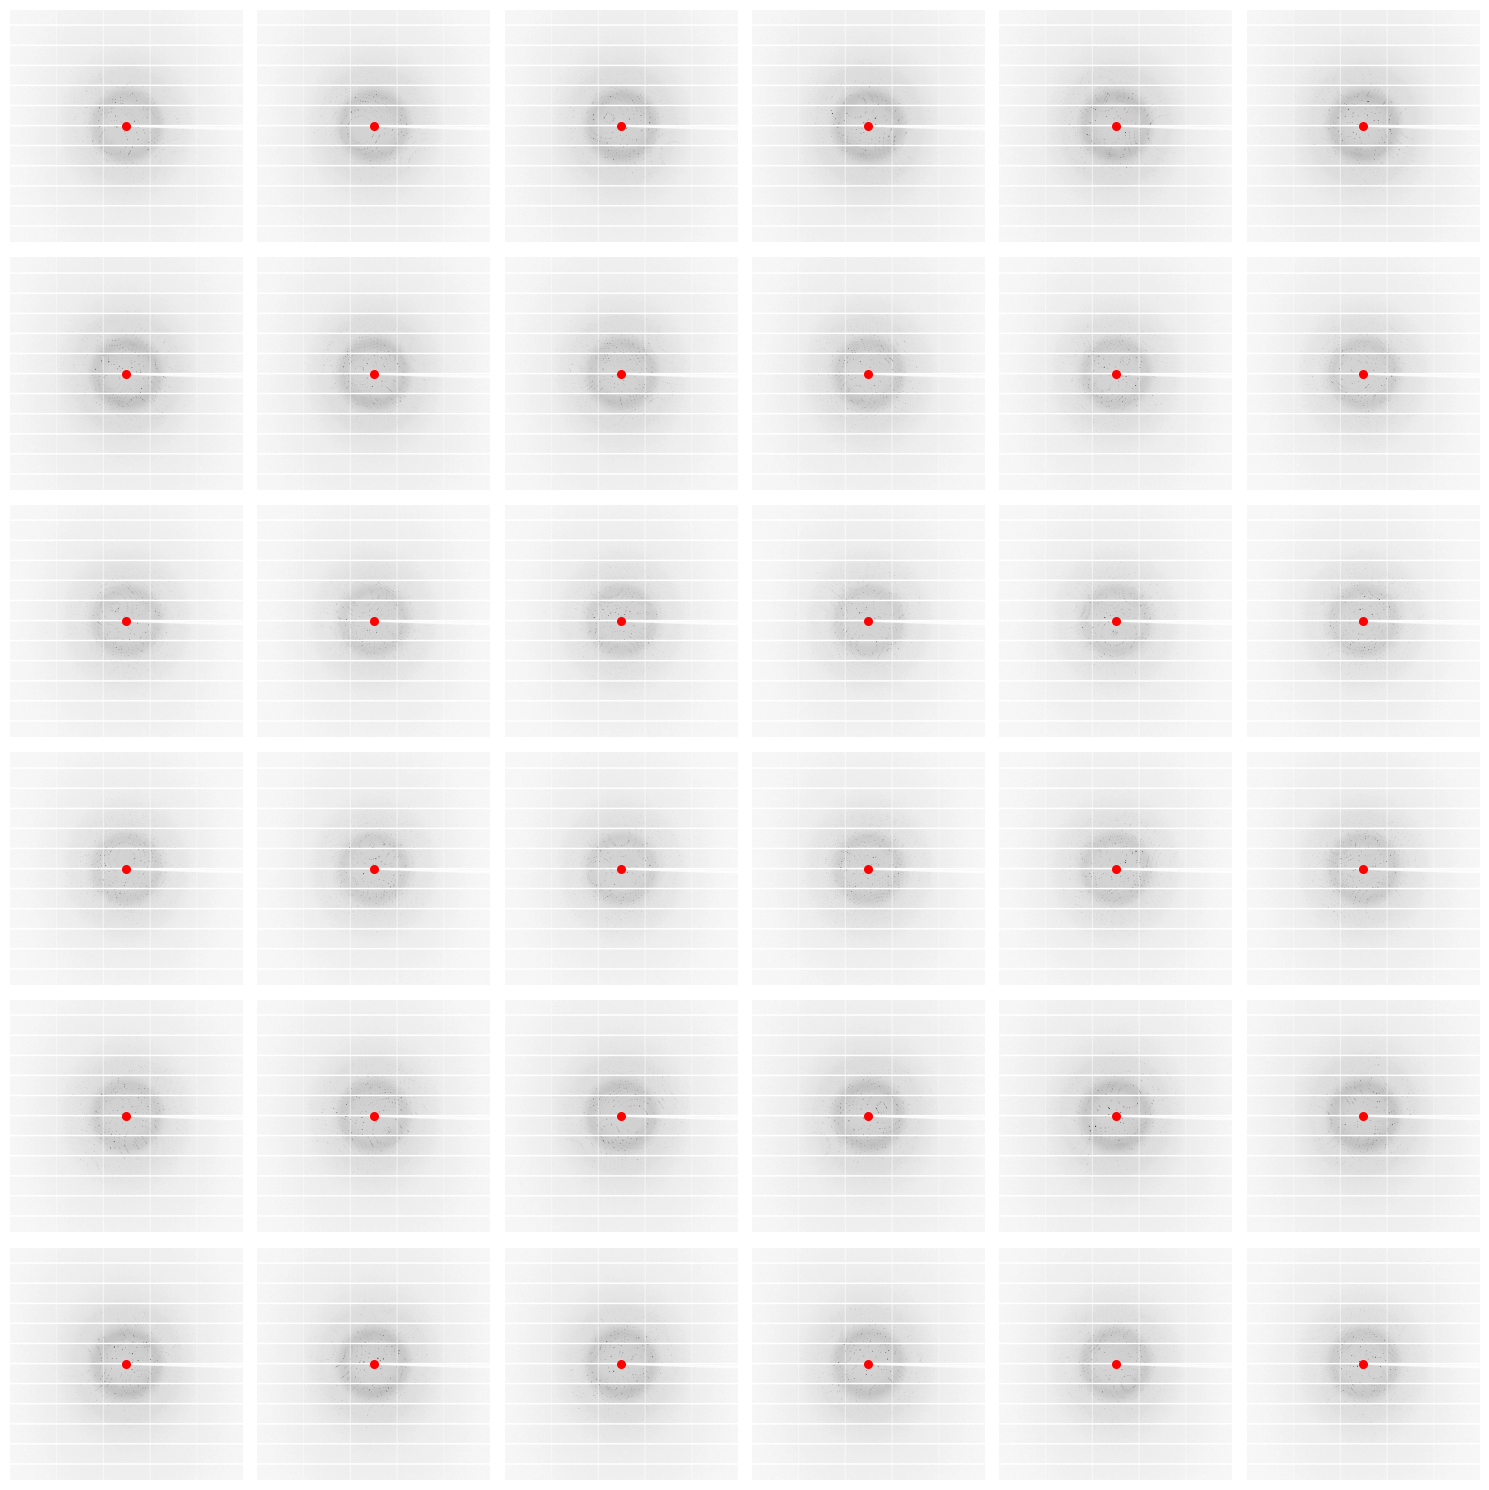

In [11]:
import matplotlib.pyplot as plt

nrows = 6
ncols = 6
fig, ax = plt.subplots(nrows, ncols, figsize=(15,15))

for i in range(nrows):
    for j in range(ncols):
        
        idx = i*ncols+j
        img = imgs[idx].reshape(820,820)
        x,y = transform_preds_random[idx][0]
        
        ax[i,j].imshow(img, vmax=30, cmap='gray_r')
        ax[i,j].scatter(x, y, color='red', s=30)
        ax[i,j].axis('off')
        
plt.tight_layout()
plt.show()

In [7]:
model = create_resnet('cpu', 18, 250, 0, pretrained_weights=False)

#load model parameters
model.load_state_dict(torch.load('/home/jadethai/dials/capstone-SLAC/environment/models/resnet18_trainbs16_testbs16_offset410_activations250_lr0.5_wd0_mom0_SGD_L1_epochs100.pth'))

#set model to eval mode
model.eval()

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
Sequential (Sequential)                       [16, 1, 820, 820]    [16, 2]              --                   True
├─ResNet (0)                                  [16, 1, 820, 820]    [16, 1000]           --                   True
│    └─Conv2d (conv1)                         [16, 1, 820, 820]    [16, 64, 410, 410]   3,136                True
│    └─BatchNorm2d (bn1)                      [16, 64, 410, 410]   [16, 64, 410, 410]   128                  True
│    └─ReLU (relu)                            [16, 64, 410, 410]   [16, 64, 410, 410]   --                   --
│    └─MaxPool2d (maxpool)                    [16, 64, 410, 410]   [16, 64, 205, 205]   --                   --
│    └─Sequential (layer1)                    [16, 64, 205, 205]   [16, 64, 205, 205]   --                   True
│    │    └─BasicBlock (0)                    [16, 64, 205, 205]   [16, 64, 205, 205]  

Sequential(
  (0): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [15]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
0.conv1.weight 	 torch.Size([64, 1, 7, 7])
0.bn1.weight 	 torch.Size([64])
0.bn1.bias 	 torch.Size([64])
0.bn1.running_mean 	 torch.Size([64])
0.bn1.running_var 	 torch.Size([64])
0.bn1.num_batches_tracked 	 torch.Size([])
0.layer1.0.conv1.weight 	 torch.Size([64, 64, 3, 3])
0.layer1.0.bn1.weight 	 torch.Size([64])
0.layer1.0.bn1.bias 	 torch.Size([64])
0.layer1.0.bn1.running_mean 	 torch.Size([64])
0.layer1.0.bn1.running_var 	 torch.Size([64])
0.layer1.0.bn1.num_batches_tracked 	 torch.Size([])
0.layer1.0.conv2.weight 	 torch.Size([64, 64, 3, 3])
0.layer1.0.bn2.weight 	 torch.Size([64])
0.layer1.0.bn2.bias 	 torch.Size([64])
0.layer1.0.bn2.running_mean 	 torch.Size([64])
0.layer1.0.bn2.running_var 	 torch.Size([64])
0.layer1.0.bn2.num_batches_tracked 	 torch.Size([])
0.layer1.1.conv1.weight 	 torch.Size([64, 64, 3, 3])
0.layer1.1.bn1.weight 	 torch.Size([64])
0.layer1.1.bn1.bias 	 torch.Size([64])
0.layer1.1.bn1.running_mean 	 torch.Size([64])
0.layer1.1.bn1.runnin

In [8]:
model = model.to('cpu')
preds = []
imgs = []
for file in os.listdir('E5_reduced'):
    if file[:4] == 'rank':
        h = h5py.File('E5_reduced/'+file, 'r')
        N = h['images'].shape[0]
        for i_img in range(N):
            img = np.array(h['images'][i_img]).astype(np.float32)[None,None]
            imgs.append(img)
            # print(img.shape) # should be 1,1,820,820 or whatever
            img_t = torch.tensor(img)
            #make predictions
            with torch.no_grad():
                pred = (model(img_t))
                print(pred)
                preds.append(pred)

tensor([[ 0.5085, -0.4924]])
tensor([[ 0.5071, -0.4929]])
tensor([[ 0.5198, -0.4929]])
tensor([[ 0.5082, -0.4929]])
tensor([[ 0.5003, -0.4929]])
tensor([[ 0.4903, -0.4939]])
tensor([[ 0.5076, -0.4933]])
tensor([[ 0.5120, -0.4923]])
tensor([[ 0.5115, -0.4924]])
tensor([[ 0.4880, -0.4933]])
tensor([[ 0.5040, -0.4926]])
tensor([[ 0.5070, -0.4924]])
tensor([[ 0.5033, -0.4930]])
tensor([[ 0.5139, -0.4916]])
tensor([[ 0.5138, -0.4916]])
tensor([[ 0.5143, -0.4917]])
tensor([[ 0.5146, -0.4918]])
tensor([[ 0.5119, -0.4920]])
tensor([[ 0.5130, -0.4921]])
tensor([[ 0.5049, -0.4920]])
tensor([[ 0.5137, -0.4916]])
tensor([[ 0.5131, -0.4918]])
tensor([[ 0.5111, -0.4921]])
tensor([[ 0.5044, -0.4940]])
tensor([[ 0.5138, -0.4917]])
tensor([[ 0.4996, -0.4930]])
tensor([[ 0.5138, -0.4922]])
tensor([[ 0.5116, -0.4920]])
tensor([[ 0.5048, -0.4930]])
tensor([[ 0.5081, -0.4931]])
tensor([[ 0.5103, -0.4919]])
tensor([[ 0.5122, -0.4925]])
tensor([[ 0.4995, -0.4934]])
tensor([[ 0.4947, -0.4928]])
tensor([[ 0.51

In [9]:
target_transform = lambda xy:xy+410
transform_preds = target_transform(np.array(preds))
transform_preds

array([[[410.50854, 409.50763]],

       [[410.5071 , 409.50708]],

       [[410.51984, 409.50708]],

       ...,

       [[410.50848, 409.50745]],

       [[410.51025, 409.50806]],

       [[410.51282, 409.508  ]]], dtype=float32)

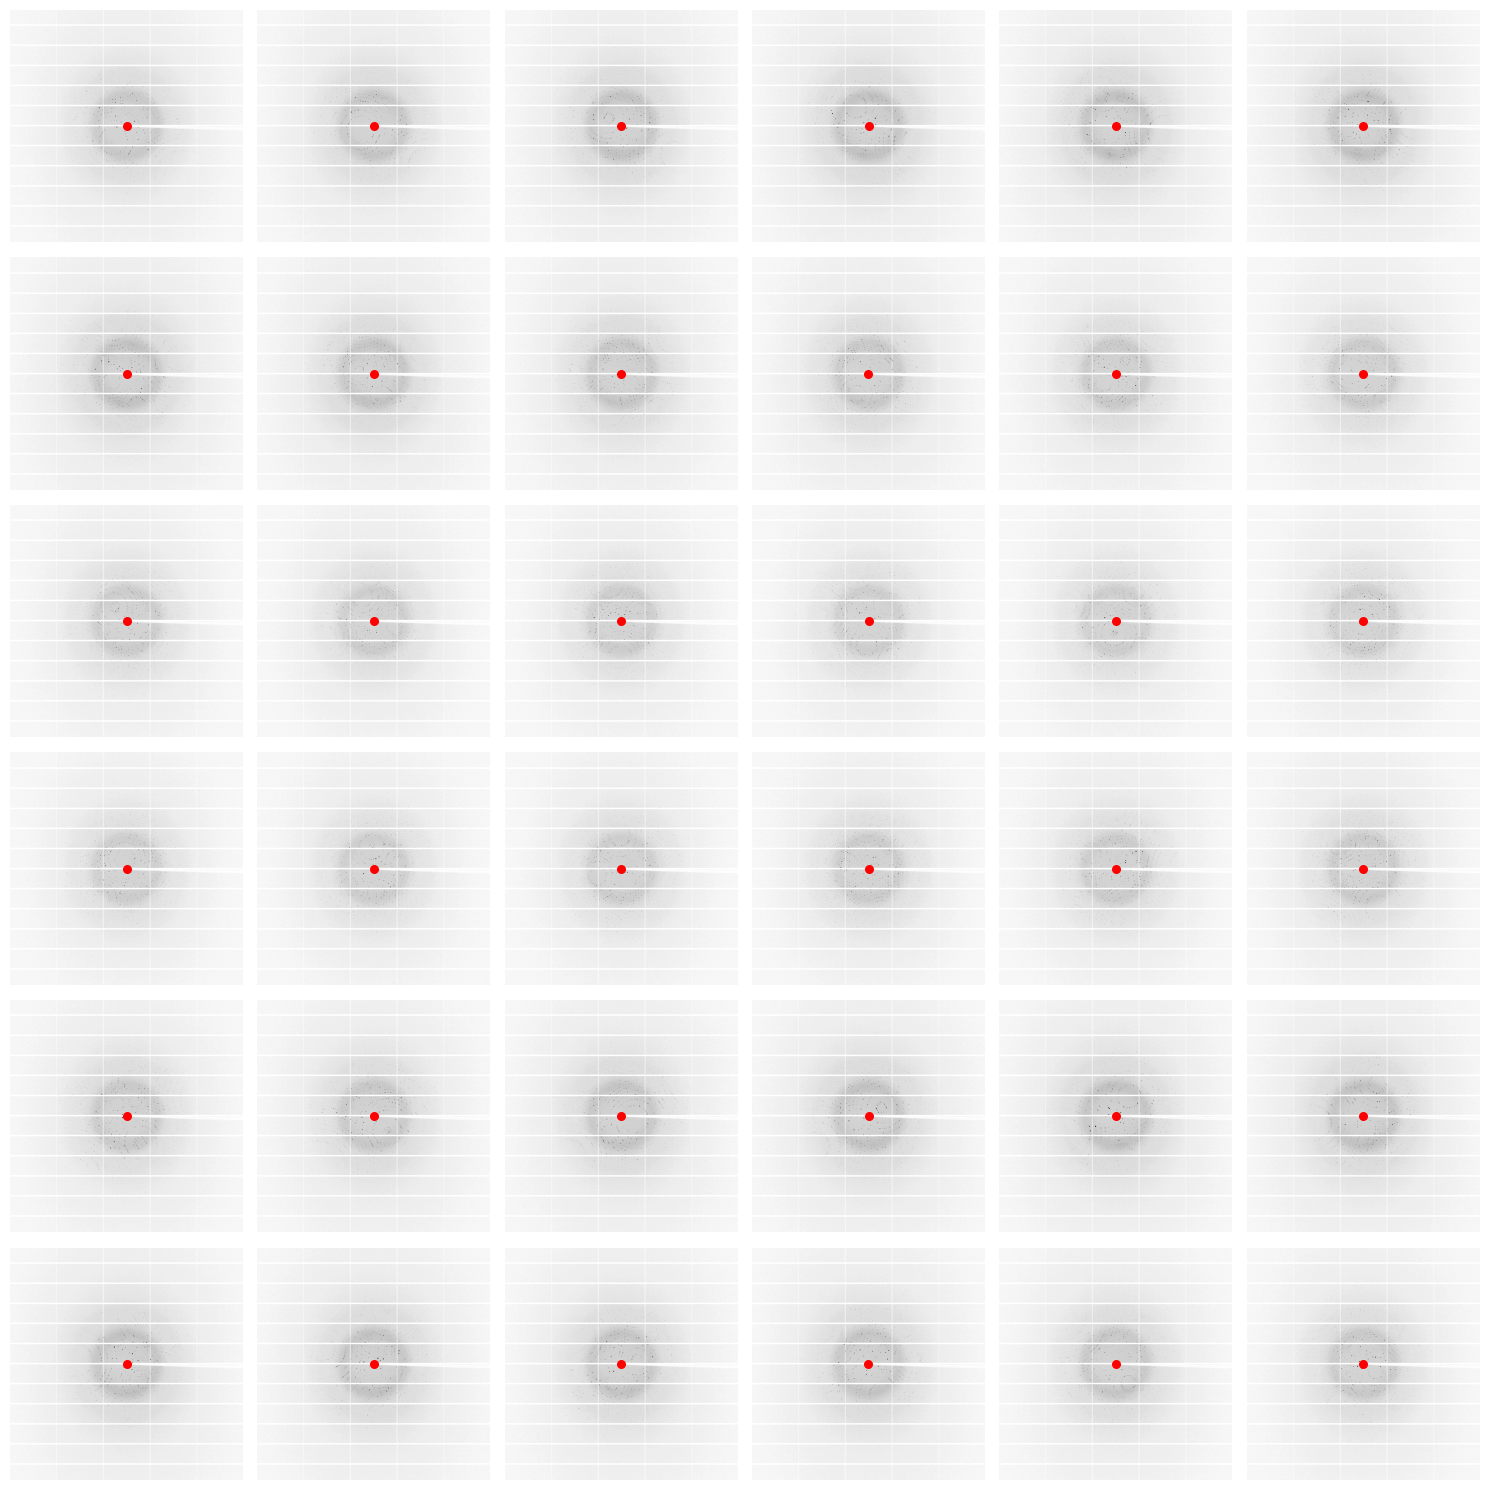

In [10]:
import matplotlib.pyplot as plt

nrows = 6
ncols = 6
fig, ax = plt.subplots(nrows, ncols, figsize=(15,15))

for i in range(nrows):
    for j in range(ncols):
        
        idx = i*ncols+j
        img = imgs[idx].reshape(820,820)
        x,y = transform_preds[idx][0]
        
        ax[i,j].imshow(img, vmax=30, cmap='gray_r')
        ax[i,j].scatter(x, y, color='red', s=30)
        ax[i,j].axis('off')
        
plt.tight_layout()
plt.show()

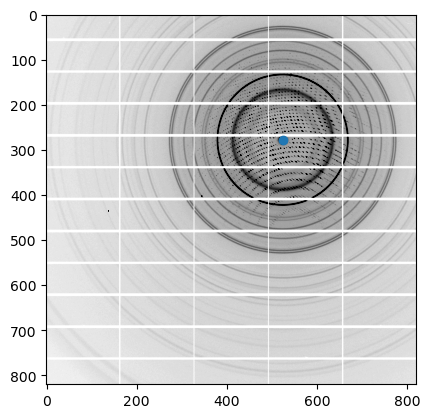

In [62]:
# centering 6
import h5py
h = h5py.File("master-cent-6.hdf5", "r")
plt.imshow(h['images'][0], vmax=30, cmap='gray_r')
plt.scatter(410+113.9675, 410-131.5982)

In [24]:
from torch.utils.data import Dataset
class TrainingData(Dataset):
    
    def __init__(self, file, transform = None, target_transform = None, **kwags):
        '''
        A class to initialize our training data.
        Args:
            file: string (master.hdf5)
            transform: callable function to apply to images
            target_transform: callable function to apply to target

        Initiate: data = TrainingData("master...")
        '''
        self.file = file
        self.transform = transform
        self.target_transform = target_transform
        self.imgs, self.labels = self._extract_data()

    def __len__(self):
        '''
        Grabs the number of observations
        '''
        assert len(self.imgs) == len(self.labels)
        return len(self.imgs)

    def __getitem__(self, idx):
        '''
        this is how we can select examples
        '''
        img = torch.tensor(self.imgs[idx].astype(np.float32))
        label = torch.tensor(self.labels[idx].reshape(2,1).astype(np.float32))
        
        if self.transform:
            img = self.transform(img)
        if self.target_transform:
            label = self.target_transform(label)

        return img, label

    def _extract_data(self, **kwargs):
        '''
        Extracts the images and the labels from the hdf5 label.
        Returns: Tuple --> (images, labels)
        '''
        # open our master file 
        h = h5py.File(self.file, "r")
        # grab the images 
        imgs = h['images']
        # grab the labels 
          # first find the indexes with the attribbutes 
        idx1 = list(h['labels'].attrs['names']).index('cent_fast_train')
        idx2 = list(h['labels'].attrs['names']).index('cent_slow_train')
        # then we extract 
        labels = h['labels'][:, [idx1, idx2]]
    
        return imgs, labels

In [57]:
# pretrained model
model_random.eval()
model_random = model_random.to('cpu')
preds_random_cent_6 = []

from torch.utils.data import DataLoader
data = TrainingData('master-cent-6.hdf5')
train_dataloader = DataLoader(data, batch_size=1)

with torch.no_grad():
    for X, y in train_dataloader:
        pred = model_random(X.unsqueeze(1)).unsqueeze(2).reshape(2)
        preds_random_cent_6.append(pred)
        y = y.reshape(2)-410
        print(f'ACTUAL: {y}   PREDICTED: {pred}')

ACTUAL: tensor([ 113.9675, -131.5982])   PREDICTED: tensor([ 0.9060, -0.3404])
ACTUAL: tensor([-70.2449,  10.3802])   PREDICTED: tensor([ 1.0450, -0.5480])
ACTUAL: tensor([175.5024,  72.9131])   PREDICTED: tensor([ 0.8160, -0.2424])
ACTUAL: tensor([ 39.8459, -21.1390])   PREDICTED: tensor([ 1.0994, -0.4403])
ACTUAL: tensor([143.6117, 179.0205])   PREDICTED: tensor([ 1.1418, -0.5964])
ACTUAL: tensor([-179.5784,  -43.9989])   PREDICTED: tensor([ 0.9158, -0.4621])
ACTUAL: tensor([157.8820, -13.6650])   PREDICTED: tensor([ 0.7434, -0.2065])
ACTUAL: tensor([  84.7626, -180.6926])   PREDICTED: tensor([ 0.9821, -0.4690])
ACTUAL: tensor([-44.5345,  36.0258])   PREDICTED: tensor([ 0.9774, -0.5624])
ACTUAL: tensor([-175.6224, -163.6900])   PREDICTED: tensor([ 0.9217, -0.3428])
ACTUAL: tensor([125.4588, 162.2252])   PREDICTED: tensor([ 1.0575, -0.3989])
ACTUAL: tensor([  37.3299, -148.0393])   PREDICTED: tensor([ 1.0119, -0.5027])
ACTUAL: tensor([178.8336, 161.7914])   PREDICTED: tensor([ 0.9653,

KeyboardInterrupt: 

In [56]:
# model trained on centering 2
model.eval()
model = model.to('cpu')
preds_cent_6 = []

from torch.utils.data import DataLoader
data = TrainingData('master-cent-6.hdf5')
train_dataloader = DataLoader(data, batch_size=1)

with torch.no_grad():
    for X, y in train_dataloader:
        pred = model(X.unsqueeze(1)).unsqueeze(2).reshape(2)
        preds_cent_6.append(pred)
        y = y.reshape(2)-410
        print(f'ACTUAL: {y}   PREDICTED: {pred}')

ACTUAL: tensor([ 113.9675, -131.5982])   PREDICTED: tensor([0.1477, 0.3809])
ACTUAL: tensor([-70.2449,  10.3802])   PREDICTED: tensor([-4.4158,  4.4997])
ACTUAL: tensor([175.5024,  72.9131])   PREDICTED: tensor([1.7536, 0.8015])
ACTUAL: tensor([ 39.8459, -21.1390])   PREDICTED: tensor([5.4886, 2.4535])
ACTUAL: tensor([143.6117, 179.0205])   PREDICTED: tensor([-0.0284, -3.7371])
ACTUAL: tensor([-179.5784,  -43.9989])   PREDICTED: tensor([ 1.9213, -6.7277])
ACTUAL: tensor([157.8820, -13.6650])   PREDICTED: tensor([ 0.0172, -1.5046])
ACTUAL: tensor([  84.7626, -180.6926])   PREDICTED: tensor([-0.3800,  4.8155])
ACTUAL: tensor([-44.5345,  36.0258])   PREDICTED: tensor([-3.9933,  0.7754])
ACTUAL: tensor([-175.6224, -163.6900])   PREDICTED: tensor([-1.2808, -1.5219])
ACTUAL: tensor([125.4588, 162.2252])   PREDICTED: tensor([ 1.9252, -5.6494])
ACTUAL: tensor([  37.3299, -148.0393])   PREDICTED: tensor([1.6740, 5.1371])
ACTUAL: tensor([178.8336, 161.7914])   PREDICTED: tensor([ 0.6441, -5.8182

KeyboardInterrupt: 

In [80]:
activations = 250
lr = 0.5
wd = 0
mom = 0

for activations in range(250,900,50):
    print(f"sbatch -J training_jade -w node120 -N 1 --ntasks=1 -p gpu \
-o trainbs16_testbs16_offset410_activations{activations}_lr{lr}_wd{wd}_mom{mom}_SGD_L1_epochs100.out \
-e trainbs16_testbs16_offset410_activations{activations}_lr{lr}_wd{wd}_mom{mom}_SGD_L1_epochs100.err \
-t 24:00:00 --wrap=\"python train.py --data_file 'master.hdf5' --train_bs 16 --test_bs 16 --train_size 0.8 \
--target_function 'lambda xy:xy-410' --model_type 18 --activations {activations} --lr {lr} --wd {wd} --mom {mom} \
--optimizer 'SGD' --cost 'L1Loss' --epochs 100 --expirement_name 'jade' --model_name 'resnet18' \
--hyperparams 'trainbs16_testbs16_offset410_activations{activations}_lr{lr}_wd{wd}_mom{mom}_SGD_L1_epochs100' --target_dir 'models' \
--model_save 'resnet18_trainbs16_testbs16_offset410_activations{activations}_lr{lr}_wd{wd}_mom{mom}_SGD_L1_epochs100.pth'\"")
    print('\n')

sbatch -J training_jade -w node120 -N 1 --ntasks=1 -p gpu -o trainbs16_testbs16_offset410_activations250_lr0.5_wd0_mom0_SGD_L1_epochs100.out -e trainbs16_testbs16_offset410_activations250_lr0.5_wd0_mom0_SGD_L1_epochs100.err -t 24:00:00 --wrap="python train.py --data_file 'master.hdf5' --train_bs 16 --test_bs 16 --train_size 0.8 --target_function 'lambda xy:xy-410' --model_type 18 --activations 250 --lr 0.5 --wd 0 --mom 0 --optimizer 'SGD' --cost 'L1Loss' --epochs 100 --expirement_name 'jade' --model_name 'resnet18' --hyperparams 'trainbs16_testbs16_offset410_activations250_lr0.5_wd0_mom0_SGD_L1_epochs100' --target_dir 'models' --model_save 'resnet18_trainbs16_testbs16_offset410_activations250_lr0.5_wd0_mom0_SGD_L1_epochs100.pth'"


sbatch -J training_jade -w node120 -N 1 --ntasks=1 -p gpu -o trainbs16_testbs16_offset410_activations300_lr0.5_wd0_mom0_SGD_L1_epochs100.out -e trainbs16_testbs16_offset410_activations300_lr0.5_wd0_mom0_SGD_L1_epochs100.err -t 24:00:00 --wrap="python train.p